In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

%matplotlib inline

import time
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from pactools.grid_search import GridSearchCVProgressBar

from sklearn.metrics import accuracy_score

# classification models
import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

C:\Users\n3rDx\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
data = 'cleaned_traintest.csv'

In [3]:
df = pd.read_csv(data)
df.drop(labels='Unnamed: 0',axis = 1,inplace = True)
df.drop(labels='SnowFall',axis = 1,inplace = True)

C:\Users\n3rDx\Anaconda3\lib\site-packages\seaborn\matrix.py:268: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  fontsize = tick.label.get_size()


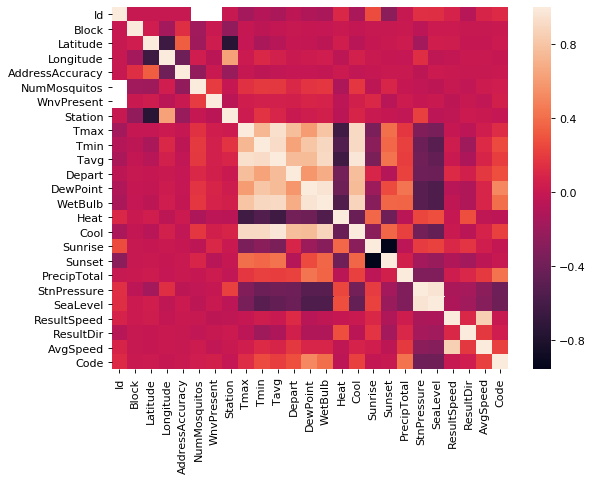

In [4]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
sns.heatmap(df.corr())

In [5]:
def create_day_of_wk(x):
    date_time = dt.datetime.strptime(x,'%Y-%m-%d')
    return date_time.strftime('%a')
def create_year(x):
    date_time = dt.datetime.strptime(x,'%Y-%m-%d')
    return date_time.strftime('%Y')
def create_month(x):
    date_time = dt.datetime.strptime(x,'%Y-%m-%d')
    return date_time.strftime('%m')
def create_day(x):
    date_time = dt.datetime.strptime(x,'%Y-%m-%d')
    return date_time.strftime('%d')


In [6]:
df["day_of_week"] = df['Date'].apply(create_day_of_wk)
df["year"] = df['Date'].apply(create_year)
df["month"] = df['Date'].apply(create_month)
df["day"] = df['Date'].apply(create_day)

In [7]:
columns = ['Id','year','month','day','day_of_week','Species','Latitude','Longitude'
           ,'WnvPresent','Tavg','DewPoint','WetBulb','PrecipTotal','ResultSpeed',
          'ResultDir','AvgSpeed','Code']

In [8]:
df = df[columns]

(126799, 17)

In [18]:
df = pd.get_dummies(df,columns =['Species','day_of_week'],drop_first=True)

In [19]:
df.columns

Index(['Id', 'year', 'month', 'day', 'Latitude', 'Longitude', 'WnvPresent',
       'Tavg', 'DewPoint', 'WetBulb', 'PrecipTotal', 'ResultSpeed',
       'ResultDir', 'AvgSpeed', 'Code', 'Species_CULEX PIPIENS',
       'Species_CULEX PIPIENS/RESTUANS', 'Species_CULEX RESTUANS',
       'Species_CULEX SALINARIUS', 'Species_CULEX TARSALIS',
       'Species_CULEX TERRITANS', 'Species_UNSPECIFIED CULEX',
       'day_of_week_Mon', 'day_of_week_Thu', 'day_of_week_Tue',
       'day_of_week_Wed'],
      dtype='object')

In [20]:
test = df[df['WnvPresent'].isnull()]

In [21]:
train = df[df['WnvPresent'].notnull()]

In [22]:
test.drop(labels='WnvPresent',axis=1,inplace=True)

In [23]:
train.drop(labels='Id',axis=1,inplace=True)

In [24]:
train.to_csv('clean_train.csv')

In [25]:
test.to_csv('clean_test.csv')